## Observations and Insights

Observations from this drug study:
1) Capomulin and Ramicane were the most sampled drugs in this study, while Propriva was the least sampled.
2) Of the ten drugs studies, Ramicane recorded the lowest score in each of the five summary statistical categories when  looking at tumor volumn:
        (mean tumor volume, median tumor volumn, tumor volumn variance, tumor volumn standard deviation, and tumor SEM)
3) The final tumor volume difference between the 90th and 10th percentiles was significantly smaller for the mice on either Capomulin or Infubinal when compared to the mice on either Ramicane or Ceftamin
4) I would recommend additional analysis be run to prove weather any of the drugs are effective at reducing the cancer over time.

## Dependencies and starter code

In [138]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns
import csv

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
single_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how="left")

# single_df.head()
# single_df.to_csv("single_df.csv")

## Summary statistics

In [139]:
""" Generate a summary statistics table of
    mean, median, variance, standard deviation, and SEM
    of the tumor volume for each regimen
"""

summary_stat_df = single_df.groupby("Drug Regimen")

mean_tumor =     summary_stat_df["Tumor Volume (mm3)"].mean().map('{:.2f}'.format)
median_tumor =   summary_stat_df["Tumor Volume (mm3)"].median().map('{:.2f}'.format)
variance_tumor = summary_stat_df["Tumor Volume (mm3)"].var().map('{:.2f}'.format)
std_dev_tumor =  summary_stat_df["Tumor Volume (mm3)"].std().map('{:.2f}'.format)
sem_tumor =      summary_stat_df["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)

# Create Summary Stat data frame (DF) to hold results
summary_stat_df = pd.DataFrame({"Mean Tumor Vol.":mean_tumor,
                                "Median Tumor Vol.":median_tumor,
                                "Tumor Vol. Variance":variance_tumor,
                                "Tumor Vol. Std. Dev.":std_dev_tumor,
                                "Tumor Vol. Std. Err.":sem_tumor})

# Display Summary Stat DF
summary_statistics_table = summary_stat_df[["Mean Tumor Vol.",
                                            "Median Tumor Vol.",
                                            "Tumor Vol. Variance",
                                            "Tumor Vol. Std. Dev.",
                                            "Tumor Vol. Std. Err."]]
summary_statistics_table
# summary_statistics_table.to_csv("summary_statistics_table.csv")

,Mean Tumor Vol.,Median Tumor Vol.,Tumor Vol. Variance,Tumor Vol. Std. Dev.,Tumor Vol. Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

In [140]:
# Bar plot setup
single_df.groupby("Drug Regimen")
drug_data_pts = single_df["Drug Regimen"].value_counts()
drug_data_pts_df = drug_data_pts.to_frame() 
drug_data_pts_df = drug_data_pts_df.rename(columns={"Drug Regimen" : "Number of Data Pts."})

drug_data_pts_df.index.name = "Drug Name"
#drug_data_pts_df

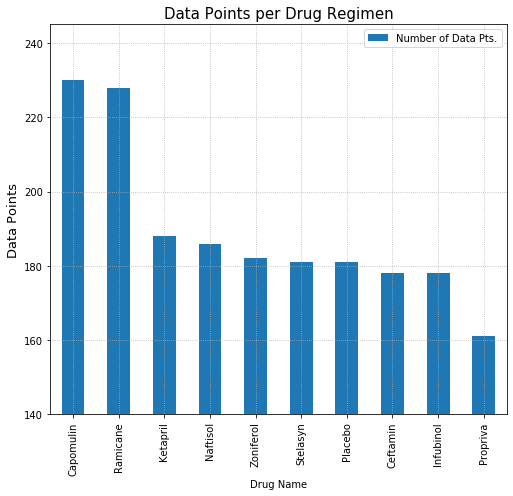

In [141]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
%matplotlib inline
pandas_bar_plot = drug_data_pts_df[["Number of Data Pts."]]

pandas_bar_plot.plot(kind="bar", figsize=(7, 7))
plt.title("Data Points per Drug Regimen", fontsize=15)
plt.tight_layout()
plt.ylabel("Data Points", fontsize=13)
plt.ylim(140, 245)
plt.grid(linestyle="dotted")
plt.savefig("../Images/Data Points Per Drug Regimen.png")
plt.show()

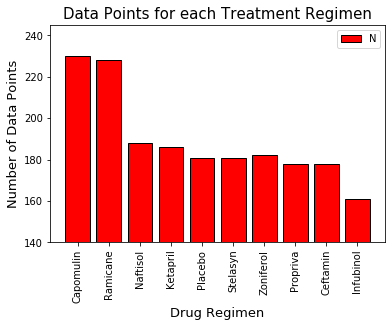

In [142]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimens = ("Capomulin", "Ramicane","Naftisol", "Ketapril", 
            "Placebo", "Stelasyn", "Zoniferol", "Ceftamin", 
            "Infubinol", "Propriva")
point_in_regimen = [230, 228, 188, 186, 181, 181, 182, 178, 178, 161]
x_axis = np.arange(len(regimens))

# Create a bar chart based upon the above data
plt.bar(regimens,point_in_regimen, facecolor="red", edgecolor="black",align="center")

plt.title("Data Points for each Treatment Regimen", fontsize = 15)
plt.xlabel("Drug Regimen", fontsize = 13)
plt.ylabel("Number of Data Points", fontsize = 13)
plt.ylim(140, 245)
plt.legend("Number", fontsize = 10)

#plt.xticks(x_axis, regimens)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane","Naftisol", "Ketapril", 
                            "Placebo", "Stelasyn", "Zoniferol", "Propriva", 
                            "Ceftamin", "Infubinol"], rotation='vertical')
plt.show()

## Pie plots

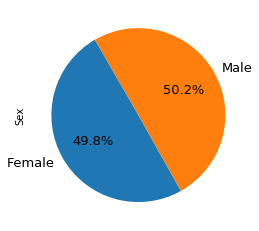

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = mouse_metadata.groupby("Sex")
gender_count = gender_group["Sex"].count()

# Create a bar chart based off of the group series from before
gender_chart = gender_count.plot(kind="pie", startangle=120, autopct="%1.1f%%", fontsize=13)

# The colors of each section of the pie chart
colors = ["red", "blue"]

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

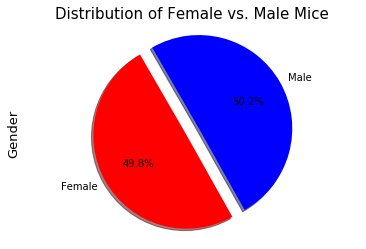

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#gender_group = mouse_metadata.groupby("Sex")
#gender_count = gender_group['Sex'].count()

colors = ["red", "blue"]
explode = (0.15,0)
genders = ["Female", "Male"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender_count, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
# Create axes which are equal so we have a perfect circle
plt.ylabel("Gender", fontsize=13)
plt.axis("equal")
plt.title("Distribution of Female vs. Male Mice", fontsize=15)
plt.savefig("../Images/Distribution of Female vs Male Mice.png")
plt.show()

## Quartiles, outliers and boxplots

In [145]:
"""
    Calculate the final tumor volume of each mouse across four of the most promising treatment regimens
    Calculate the IQR and quantitatively determine if there are any potential outliers.
    Capomulin
"""

Capomulin_df = single_df[single_df["Drug Regimen"] == "Capomulin"]
CapomulinData = Capomulin_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
CapomulinData = CapomulinData.groupby(["Mouse ID", "Drug Regimen"])
CapomulinDF = CapomulinData["Tumor Volume (mm3)"].sum().to_frame()
CapomulinPlot = CapomulinDF["Tumor Volume (mm3)"]
CapomulinDF.head()

# quartile calculations
quartiles = CapomulinPlot.quantile([.25,.5,.75])
upperq = quartiles[0.75]
lowerq = quartiles[0.25]
IQR = upperq-lowerq

print(f"Capomulin:  The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"Capomulin:  The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")
print(f"Capomulin:  The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"Capomulin:  The interquartile range of Tumor Volume (mm3) is: {IQR}")

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)
print(f"Capomulin:  Values above {upper_bound} could be outliers.")
print(f"Capomulin:  Values below {lower_bound} could be outliers.")

Capomulin:  The upper quartile of Tumor Volume (mm3) is: 425.07261035000005
Capomulin:  The the median of Tumor Volume (mm3) is: 398.87495191 
Capomulin:  The lower quartile of Tumor Volume (mm3) is: 361.82039562
Capomulin:  The interquartile range of Tumor Volume (mm3) is: 63.25221473000005
Capomulin:  Values above 519.9509324450001 could be outliers.
Capomulin:  Values below 266.94207352499996 could be outliers.


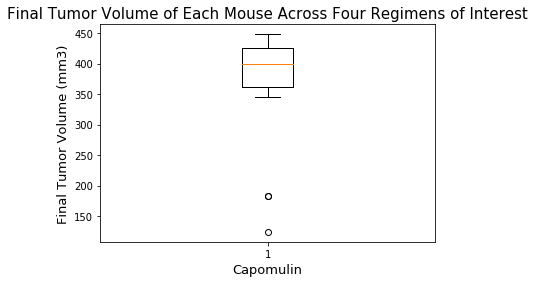

In [146]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest - Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse Across Four Regimens of Interest", fontsize=15)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize=13)
ax1.set_xlabel("Capomulin", fontsize=13)
ax1.boxplot(CapomulinPlot)
plt.savefig("../Images/Boxplot of Final Tumor Vol Across 4 Regimens - Capomulin.png")
plt.show()

In [147]:
"""
    Calculate the final tumor volume of each mouse across four of the most promising treatment regimens
    Calculate the IQR and quantitatively determine if there are any potential outliers.
    Ramicane
"""

Ramicane_df = single_df[single_df["Drug Regimen"] == "Ramicane"]
RamicaneData = Ramicane_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
RamicaneData = RamicaneData.groupby(["Mouse ID", "Drug Regimen"])
RamicaneDF = RamicaneData["Tumor Volume (mm3)"].sum().to_frame()
RamicanePlot = RamicaneDF["Tumor Volume (mm3)"]
RamicaneDF.head()

# quartile calculations
quartiles = RamicanePlot.quantile([.25,.5,.75])
upperq = quartiles[0.75]
lowerq = quartiles[0.25]
IQR = upperq-lowerq

print(f"Ramicane:  The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"Ramicane:  The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")
print(f"Ramicane:  The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"Ramicane:  The interquartile range of Tumor Volume (mm3) is: {IQR}")

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)
print(f"Ramicane:  Values above {upper_bound} could be outliers.")
print(f"Ramicane:  Values below {lower_bound} could be outliers.")

Ramicane:  The upper quartile of Tumor Volume (mm3) is: 407.0138542699999
Ramicane:  The the median of Tumor Volume (mm3) is: 388.07794580999996 
Ramicane:  The lower quartile of Tumor Volume (mm3) is: 360.50156185
Ramicane:  The interquartile range of Tumor Volume (mm3) is: 46.51229241999994
Ramicane:  Values above 476.7822928999998 could be outliers.
Ramicane:  Values below 290.73312322000004 could be outliers.


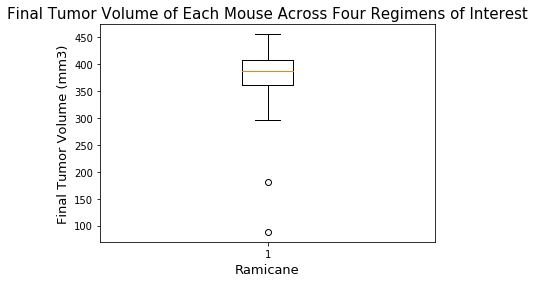

In [148]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest - Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse Across Four Regimens of Interest", fontsize=15)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize=13)
ax1.set_xlabel("Ramicane", fontsize=13)
ax1.boxplot(RamicanePlot)
plt.savefig("../Images/Boxplot of Final Tumor Vol Across 4 Regimens - Ramicane.png")
plt.show()

In [149]:
"""
    Calculate the final tumor volume of each mouse across four of the most promising treatment regimens
    Calculate the IQR and quantitatively determine if there are any potential outliers.
    Infubinol
"""

Infubinol_df = single_df[single_df["Drug Regimen"] == "Infubinol"]
InfubinolData = Infubinol_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
InfubinolData = InfubinolData.groupby(["Mouse ID", "Drug Regimen"])
InfubinolDF = InfubinolData["Tumor Volume (mm3)"].sum().to_frame()
InfubinolPlot = InfubinolDF["Tumor Volume (mm3)"]
InfubinolDF.head()

# quartile calculations
quartiles = InfubinolPlot.quantile([.25,.5,.75])
upperq = quartiles[0.75]
lowerq = quartiles[0.25]
IQR = upperq-lowerq

print(f"Infubinol:  The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"Infubinol:  The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")
print(f"Infubinol:  The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"Infubinol:  The interquartile range of Tumor Volume (mm3) is: {IQR}")

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)
print(f"Infubinol:  Values above {upper_bound} could be outliers.")
print(f"Infubinol:  Values below {lower_bound} could be outliers.")

Infubinol:  The upper quartile of Tumor Volume (mm3) is: 539.7958369400001
Infubinol:  The the median of Tumor Volume (mm3) is: 368.77146924 
Infubinol:  The lower quartile of Tumor Volume (mm3) is: 250.34313264000002
Infubinol:  The interquartile range of Tumor Volume (mm3) is: 289.45270430000005
Infubinol:  Values above 973.9748933900001 could be outliers.
Infubinol:  Values below -183.83592381000005 could be outliers.


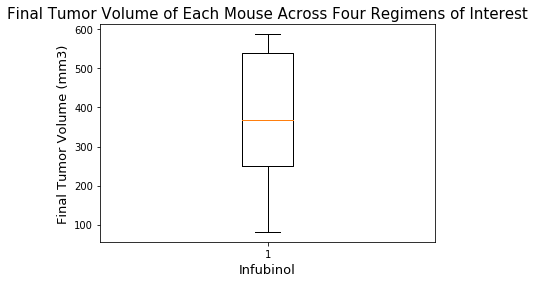

In [150]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest - Infubinol
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse Across Four Regimens of Interest", fontsize=15)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize=13)
ax1.set_xlabel("Infubinol", fontsize=13)
ax1.boxplot(InfubinolPlot)
plt.savefig("../Images/Boxplot of Final Tumor Vol Across 4 Regimens - Infubinol.png")
plt.show()

In [151]:
"""
    Calculate the final tumor volume of each mouse across four of the most promising treatment regimens
    Calculate the IQR and quantitatively determine if there are any potential outliers.
    Ceftamin
"""

Ceftamin_df = single_df[single_df["Drug Regimen"] == "Ceftamin"]
CeftaminData = Ceftamin_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
CeftaminData = CeftaminData.groupby(["Mouse ID", "Drug Regimen"])
CeftaminDF = CeftaminData["Tumor Volume (mm3)"].sum().to_frame()
CeftaminPlot = CeftaminDF["Tumor Volume (mm3)"]
CeftaminDF.head()

# quartile calculations
quartiles = CeftaminPlot.quantile([.25,.5,.75])
upperq = quartiles[0.75]
lowerq = quartiles[0.25]
IQR = upperq-lowerq

print(f"Ceftamin:  The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"Ceftamin:  The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")
print(f"Ceftamin:  The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"Ceftamin:  The interquartile range of Tumor Volume (mm3) is: {IQR}")

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)
print(f"Ceftamin:  Values above {upper_bound} could be outliers.")
print(f"Ceftamin:  Values below {lower_bound} could be outliers.")

Ceftamin:  The upper quartile of Tumor Volume (mm3) is: 534.67355232
Ceftamin:  The the median of Tumor Volume (mm3) is: 516.11146932 
Ceftamin:  The lower quartile of Tumor Volume (mm3) is: 188.23985302
Ceftamin:  The interquartile range of Tumor Volume (mm3) is: 346.4336993
Ceftamin:  Values above 1054.32410127 could be outliers.
Ceftamin:  Values below -331.41069593000003 could be outliers.


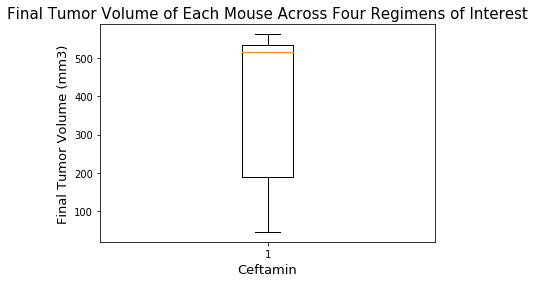

In [152]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest - Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse Across Four Regimens of Interest", fontsize=15)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize=13)
ax1.set_xlabel("Ceftamin", fontsize=13)
ax1.boxplot(CeftaminPlot)
plt.savefig("../Images/Boxplot of Final Tumor Vol Across 4 Regimens - Ceftamin.png")
plt.show()

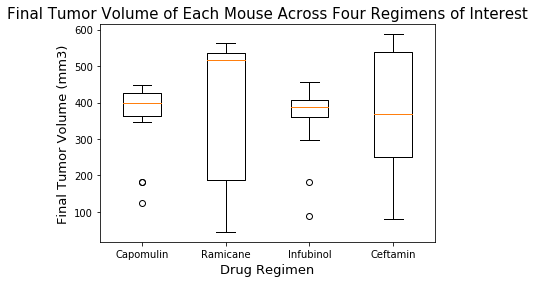

In [153]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest - ALL 4

tumor_boxplot = [CapomulinPlot, CeftaminPlot, RamicanePlot, InfubinolPlot]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse Across Four Regimens of Interest', fontsize=15)
ax1.set_ylabel('Final Tumor Volume (mm3)', fontsize=13)
ax1.set_xlabel('Drug Regimen', fontsize=13)

ax1.boxplot(tumor_boxplot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.show()

## Line and scatter plots

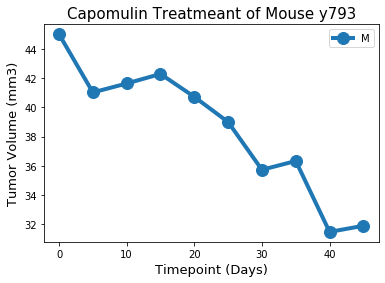

In [154]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
linePy_df = single_df.loc[single_df["Mouse ID"] == "y793",:]

timepoint = linePy_df["Timepoint"]
tumor_vol = linePy_df["Tumor Volume (mm3)"]

plt.title("Capomulin Treatmeant of Mouse y793", fontsize=15)
plt.plot(timepoint, tumor_vol,linewidth=4, marker="o", markersize=12, label="Mouse y793")
plt.xlabel("Timepoint (Days)", fontsize=13)
plt.legend("Mouse")
plt.ylabel("Tumor Volume (mm3)", fontsize=13)
plt.savefig("../Images/Time Point vs Tumor Volume for a Mouse Treated With Capomulin.png")
plt.show()

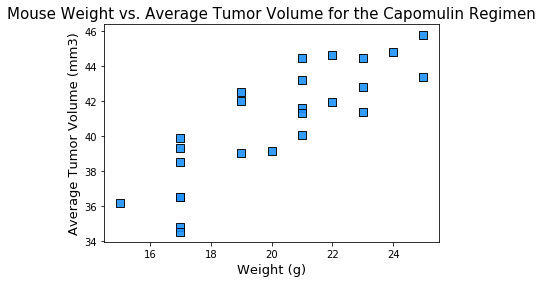

In [155]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scatter = single_df.loc[single_df["Drug Regimen"] == "Capomulin",:]
average_capomulin = capomulin_scatter.groupby(["Mouse ID"]).mean()
plt.scatter(average_capomulin["Weight (g)"],
            average_capomulin["Tumor Volume (mm3)"],
            marker="s",
            facecolors="dodgerblue",
            edgecolors="black",
            s=50,
            alpha=0.9)
plt.xlabel("Weight (g)", fontsize=13)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=13)
plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen", fontsize=15)
plt.savefig("../Images/Mouse Weight vs Average Tumor Volume for the Capomulin Regimen.png")
plt.show()

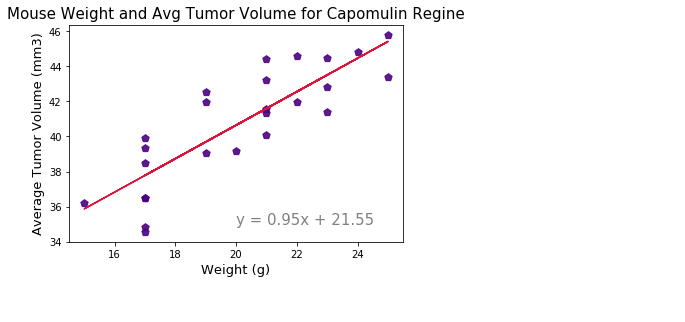

In [156]:
"""
    Calculate the correlation coefficient and linear regression model for
    mouse weight and average tumor volume for the Capomulin regimen
"""

x_values = average_capomulin["Weight (g)"]
y_values = average_capomulin["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,
            marker="p",
            facecolors="indigo",
            edgecolors="indigo",
            s=60,
            alpha=0.9)
plt.plot(x_values,regress_values,"crimson")
plt.annotate(line_eq, (30,30), fontsize=15, color="red")
plt.xlabel("Weight (g)", fontsize=13)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=13)
plt.title("Mouse Weight and Avg Tumor Volume for Capomulin Regine", fontsize=15)
plt.annotate(line_eq,(20,35),fontsize=15,color="grey")
plt.savefig("../Images/Linear Regression Model Mouse Wt and Avg Tumor Vol.png")
plt.show()